In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime, timedelta
import sys
## Replace with your own path
sys.path.append('/Users/tarabaris/GitHub/odp-sdk-python/Examples')

## For SDK
from getpass import getpass
from odp_sdk import ODPClient
# import data_stats_functions as stats_func

## For plotting
from CastFunctions import *
from DataStatsFunctions import *
import seaborn as sns
import matplotlib.pyplot as plt
import mpl_toolkits
from mpl_toolkits.basemap import Basemap, addcyclic, shiftgrid
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
import cmocean
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.lines import Line2D

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set_palette(sns.color_palette("bright"))
import warnings
warnings.filterwarnings("ignore")

# Connect to API

In [2]:
client = ODPClient(api_key=getpass(prompt='Insert your personal ODP API key:'), 
                       project="odp", client_name="odp")

Insert your personal ODP API key:········
Connection successful


# Pull data for desired lat/lon and timespan
Don't forget to specify if you want flagged data included or excluded

In [3]:
df=client.casts(longitude=[-10,35],
                latitude=[50,80], 
                timespan=['2018-06-01','2018-08-31'],
                include_flagged_data = True,
                n_threads=35) 

Locating available casts..
-> 8326 casts found
-> 869012 data rows downloaded in 91.00s


In [4]:
df.head()

,date,lat,lon,z,z_WODflag,z_origflag,Oxygen,Oxygen_WODflag,Oxygen_origflag,Temperature,Temperature_WODflag,Temperature_origflag,Salinity,Salinity_WODflag,Salinity_origflag,Chlorophyll,Chlorophyll_WODflag,Chlorophyll_origflag,Pressure,Pressure_WODflag,Pressure_origflag,Nitrate,Nitrate_WODflag,Nitrate_origflag,pH,pH_WODflag,pH_origflag,Latitude,Latitude_WODflag,Latitude_origflag,Longitude,Longitude_WODflag,Longitude_origflag,JulianDay,JulianDay_WODflag,JulianDay_origflag,externalId,datetime
0,20180711,57.9241,-9.8767,3.962919,0,1.0,NaN,NaN,NaN,13.051,0.0,1.0,35.321999,0.0,1.0,NaN,NaN,NaN,4.000000,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cast_wod_3_2018_30748_18845884,2018-07-11
1,20180711,57.9241,-9.8767,10.006222,0,1.0,NaN,NaN,NaN,12.934,0.0,1.0,35.326000,0.0,1.0,NaN,NaN,NaN,10.099999,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cast_wod_3_2018_30748_18845884,2018-07-11
2,20180711,57.9241,-9.8767,15.355884,0,1.0,NaN,NaN,NaN,12.792,0.0,1.0,35.320999,0.0,1.0,NaN,NaN,NaN,15.500000,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cast_wod_3_2018_30748_18845884,2018-07-11
3,20180711,57.9241,-9.8767,19.912893,0,1.0,NaN,NaN,NaN,12.566,0.0,1.0,35.317001,0.0,1.0,NaN,NaN,NaN,20.100000,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cast_wod_3_2018_30748_18845884,2018-07-11
4,20180711,57.9241,-9.8767,24.965105,0,1.0,NaN,NaN,NaN,12.401,0.0,1.0,35.318001,0.0,1.0,NaN,NaN,NaN,25.199999,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cast_wod_3_2018_30748_18845884,2018-07-11


# Use built-in functions to get a sense of the data present

In [5]:
missing_values(df, var_list = ['Oxygen', 'Temperature', 'Salinity', 'Chlorophyll','pH', 'Nitrate'])

,Variables,Null Values,Percentage Missing
0,Temperature,383,0.04
1,Salinity,34949,4.02
2,Oxygen,783823,90.20
3,Chlorophyll,844011,97.12
4,Nitrate,867883,99.87
5,pH,867944,99.88


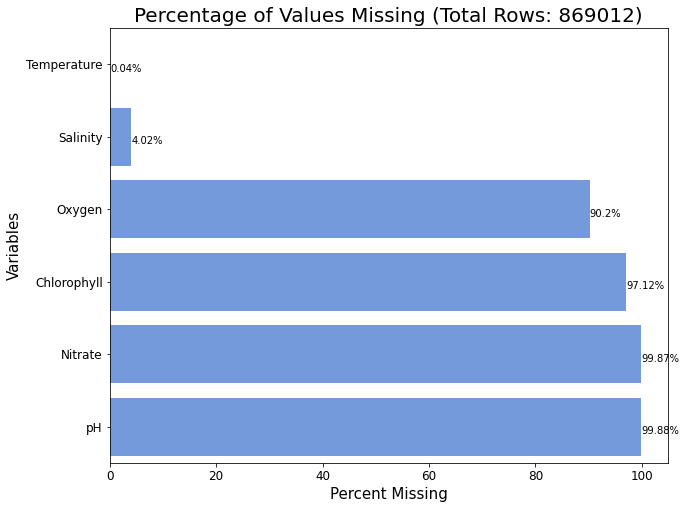

In [6]:
plot_missing(df, var_list = ['Oxygen', 'Temperature', 'Salinity', 'Chlorophyll', 'pH', 'Nitrate'])

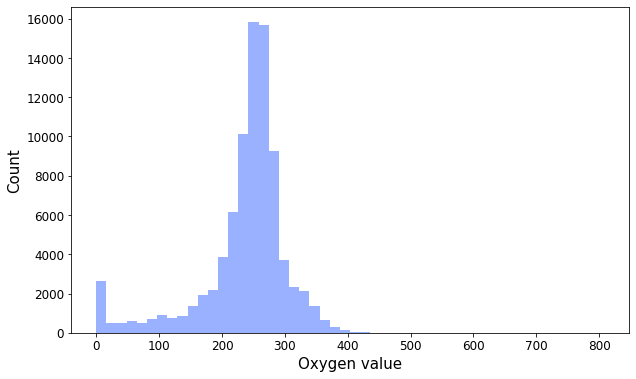

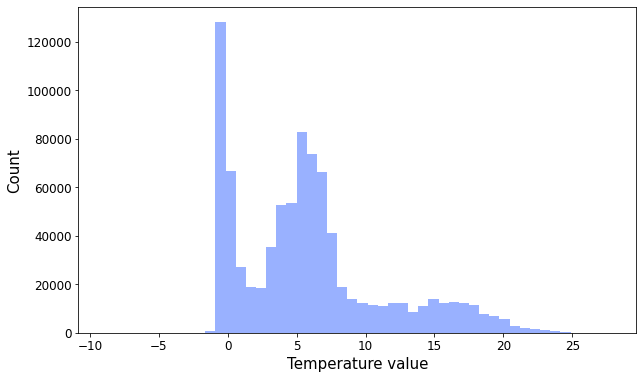

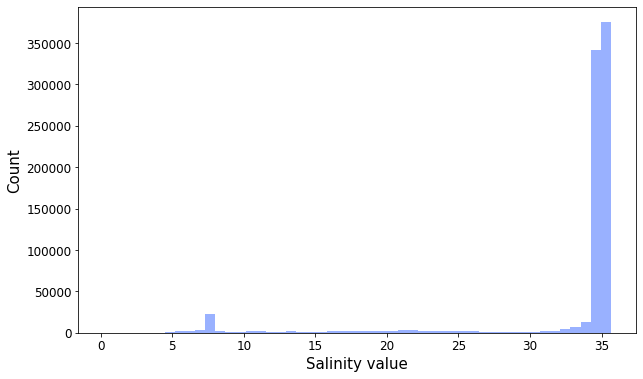

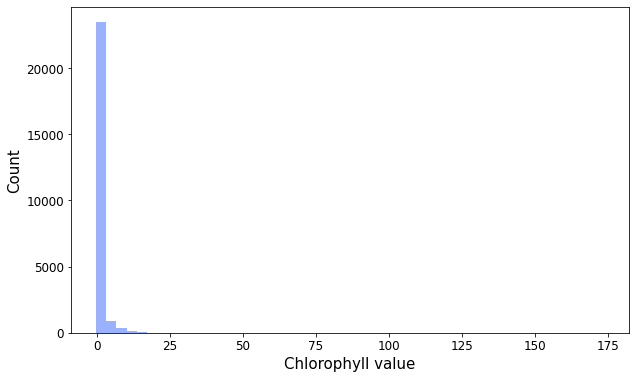

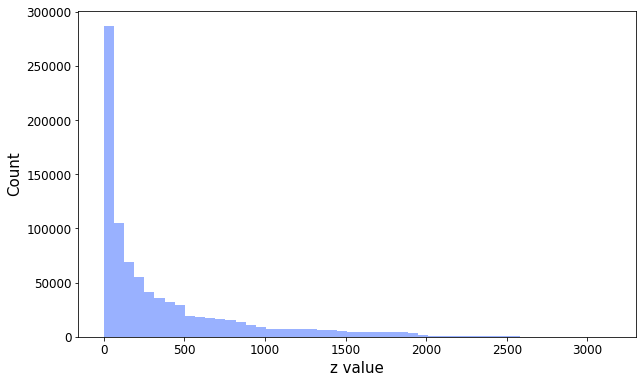

In [7]:
plot_distributions(df, var_list = ['Oxygen', 'Temperature', 'Salinity', 'Chlorophyll', 'z'])

# Get units for each variable

In [8]:
get_units()

{'z': 'm',
 'Oxygen': 'umol/kg',
 'Temperature': 'degree_C',
 'Chlorophyll': 'ugram/l',
 'Pressure': 'dbar',
 'Nitrate': 'umol/kg',
 'Latitude': 'degrees_north',
 'Longitude': 'degrees_east'}

# Plot casts for specific variable
Here we do Temperature and Oxygen. You can specify the colormap you want to use

In [9]:
## available colormaps through cmocean
cmocean.cm.cmapnames

['thermal',
 'haline',
 'solar',
 'ice',
 'gray',
 'oxy',
 'deep',
 'dense',
 'algae',
 'matter',
 'turbid',
 'speed',
 'amp',
 'tempo',
 'rain',
 'phase',
 'topo',
 'balance',
 'delta',
 'curl',
 'diff',
 'tarn']

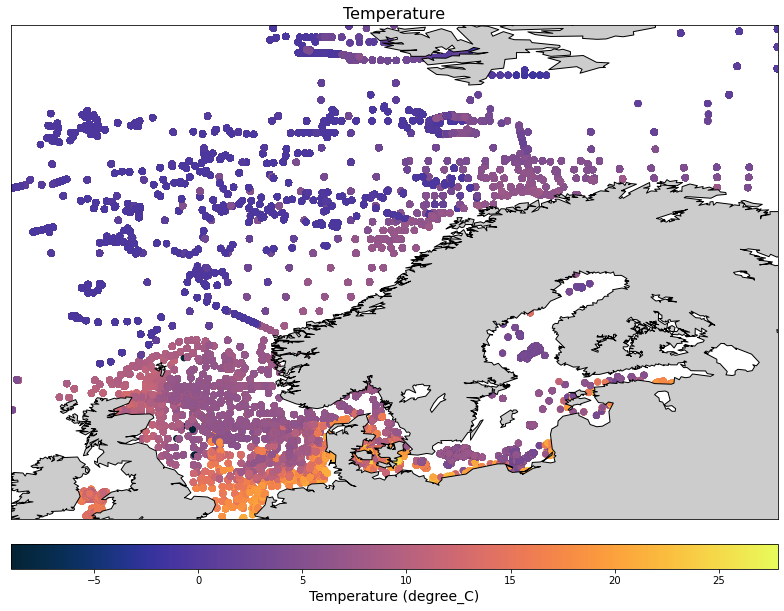

In [10]:
plot_casts('Temperature',df,cmap=cmocean.cm.thermal)


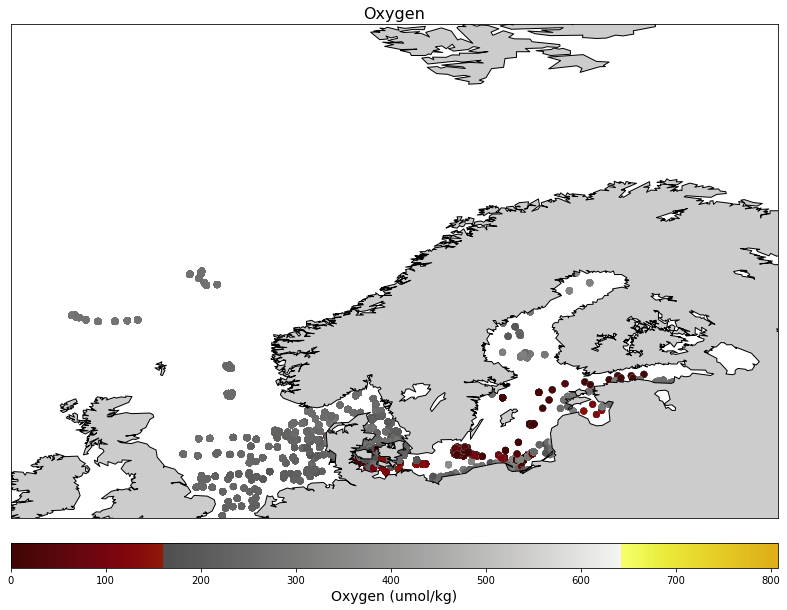

In [11]:
plot_casts('Oxygen',df,cmap=cmocean.cm.oxy)


# Let's take a look at some metadata
Get casts from 2018 in Norway region

In [26]:
longitude=[-10,35]
latitude=[50,80]

casts=client.get_available_casts(longitude=longitude,
                                latitude=latitude,
                                timespan=['2018-01-01','2018-12-31'],
                                meta_parameters=['extId','date','time','lon','lat','country','Platform','dataset_code', 'equipment'])

In [27]:
casts.head()

,index,extId,date,time,lon,lat,country,Platform,dataset_code,equipment,datetime
437,0,cast_wod_3_2018_30745_19428502,20181127,90910.5895833373,-9.490167,54.412500,GREAT BRITAIN,SCOTIA (R/V; call sign MXHR6;built 03.1998;IMO...,ctd,CTD,2018-11-27
438,1,cast_wod_3_2018_30745_18854892,20180223,90633.69027781487,-9.667833,54.910500,GREAT BRITAIN,SCOTIA (R/V; call sign MXHR6;built 03.1998;IMO...,ctd,CTD,2018-02-23
439,2,cast_wod_3_2018_30745_19428503,20181127,90910.7319445014,-9.961833,54.653830,GREAT BRITAIN,SCOTIA (R/V; call sign MXHR6;built 03.1998;IMO...,ctd,CTD,2018-11-27
440,3,cast_wod_3_2018_30745_18854893,20180224,90634.2902777791,-9.917167,54.607334,GREAT BRITAIN,SCOTIA (R/V; call sign MXHR6;built 03.1998;IMO...,ctd,CTD,2018-02-24
441,4,cast_wod_3_2018_30745_18854891,20180223,90633.5444444418,-9.027166,54.930000,GREAT BRITAIN,SCOTIA (R/V; call sign MXHR6;built 03.1998;IMO...,ctd,CTD,2018-02-23


# Plot modes of data collection for each cast

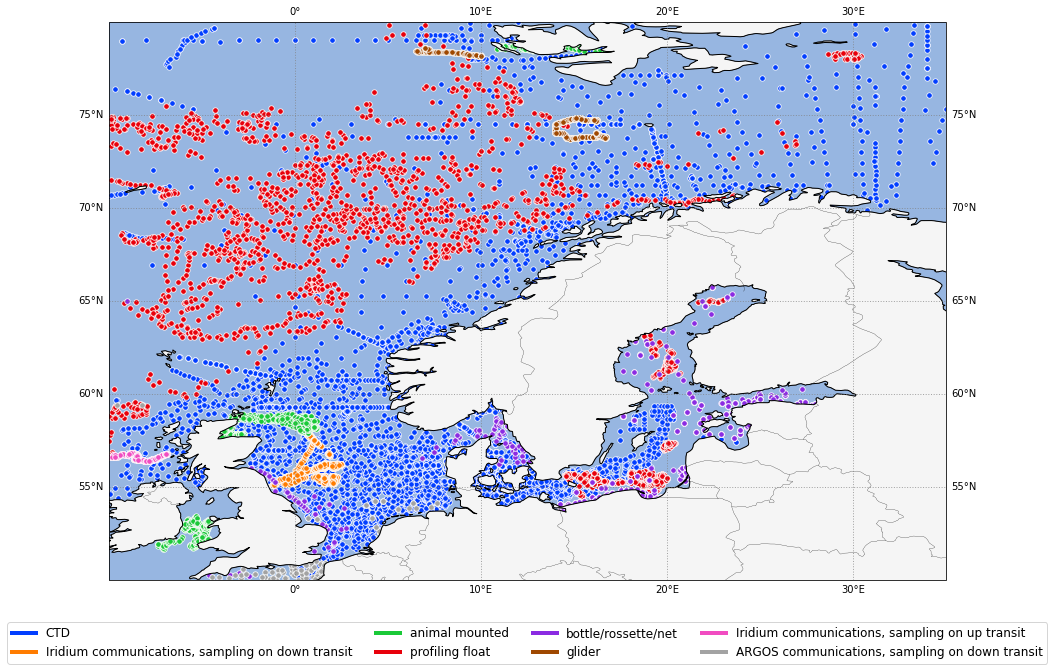

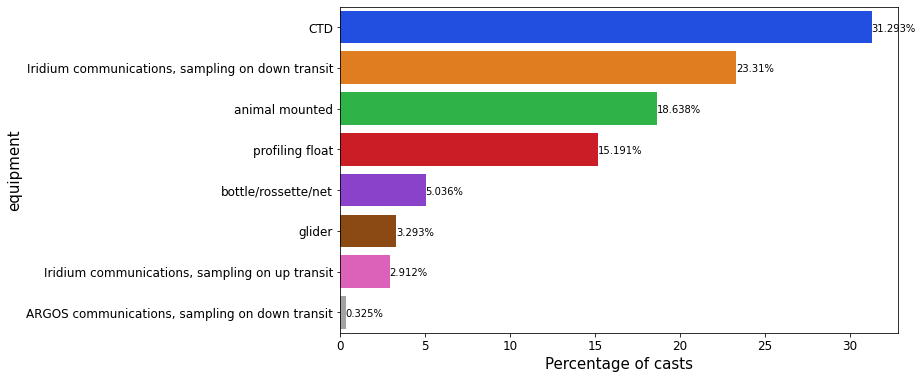

In [28]:
plot_datasets(casts, variable='equipment', longitude=longitude,latitude=latitude)

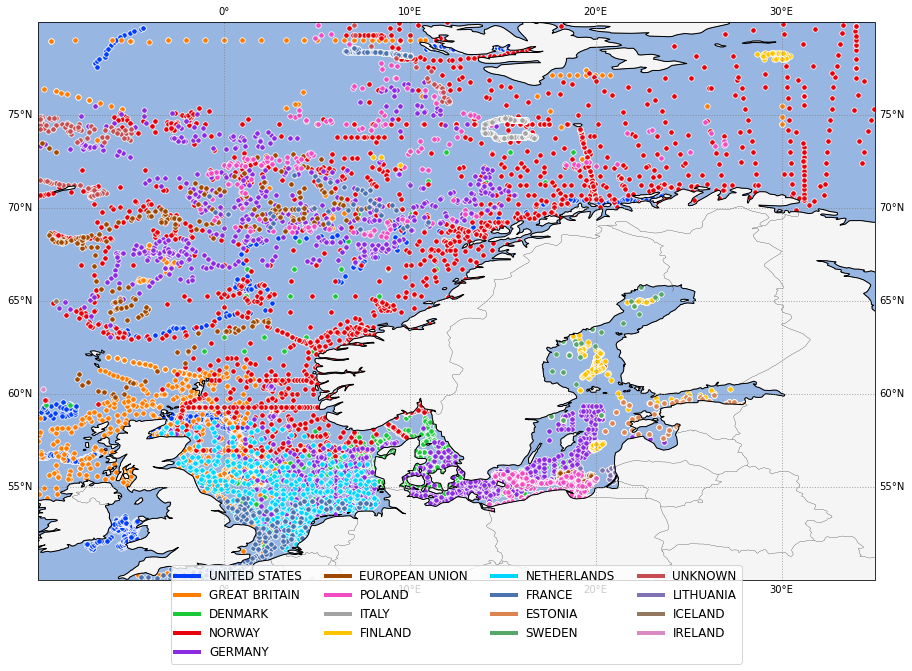

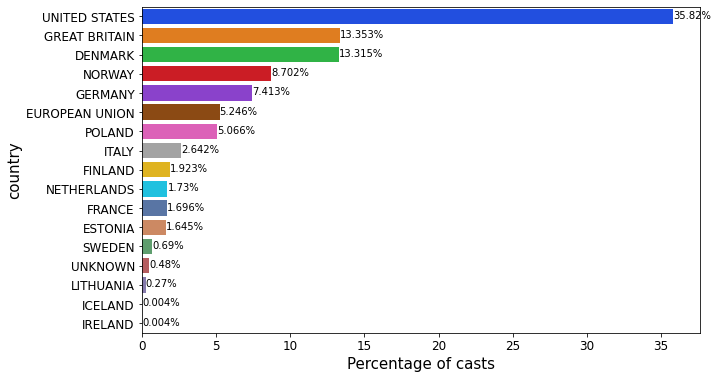

In [29]:
plot_datasets(casts, variable='country', longitude=longitude,latitude=latitude)